In [2]:
import bql
import pandas as pd
import plotly.express as px

In [3]:
bq = bql.Service()

## To set up AT1 screen , please save your search in {SRCH} as AT1

![title](img/AT1.png)

## Make sure that you have some AT1 bonds sent to yourself (eg via RUNZ)

![title](img/sampleRUNZ.png)

### AT1 Axes

In [4]:
#retrieving the dataframe
univ = bq.univ.screenresults(type='SRCH',screen_name='AT1').filter(bq.data.spread(spread_type='OAS')>0) #filter for axed univ
data = {
    'Name': bq.data.name(),
    'Rating': bq.data.BB_COmposite(),
    'Issuer': bq.data.issuer(),
    'Country': bq.data.cntry_of_risk(),
    # 'Duration':bq.data.duration()['value'],
    'OAS Spread': bq.data.spread(spread_type='OAS')['value'],
    'Yield': bq.data.yield_()['value'],

}
req = bql.Request(univ,data)
res = bq.execute(req)

df_at1 = bql.combined_df(res)

In [5]:
df_at1

,Name,Rating,Issuer,Country,OAS Spread,Yield
ID,,,,,,
ZD998612 Corp,ABISMK 5.1 PERP,N.A.,ALLIANCE ISLAMIC BANK,MY,755.546263,10.760000
YX388351 Corp,SUMIBK 2.481 PERP,N.A.,SUMITOMO MITSUI FINL GRP,JP,146.157261,2.291000
YX388494 Corp,SUMIBK 2.949 PERP,N.A.,SUMITOMO MITSUI FINL GRP,JP,172.271980,2.816000
ZF231715 Corp,OCBCSP 4.05 PERP,BBB,OVERSEA-CHINESE BANKING,SG,124.240783,3.623135
YX387931 Corp,SUMIBK 2.045 PERP,N.A.,SUMITOMO MITSUI FINL GRP,JP,132.411379,1.918000
...,...,...,...,...,...,...
YV616331 Corp,UBS 6.85 PERP,BB+,UBS GROUP AG,CH,345.815070,6.759562
YV641207 Corp,MUFG 2.446 PERP,N.A.,MITSUBISHI UFJ FIN GRP,JP,141.828005,2.436000
YV641209 Corp,MUFG 2.006 PERP,N.A.,MITSUBISHI UFJ FIN GRP,JP,125.010912,2.005000


## Where do opportunities lie?
#### OAS Spread across country & maturity buckets

In [ ]:
data = pd.pivot_table(df_at1, values='OAS Spread', index='Country',
                    columns=['Rating'], aggfunc='mean')

In [ ]:
fig = px.imshow(data, x= data.columns, y=data.index)
fig.update_layout(width=800,height=500,template='plotly_dark')
fig.update_coloraxes(
    showscale=True,
    colorscale=[
        (0.0, 'Green'),
        (0.1, 'Yellow'),
        (1,'Red')
    ],
)
fig.show()

### Yield Curve across Asian AT1s (Country of Risk: Asia)

In [7]:
df_bonds_axes = df_at1[['Name','Issuer','Dealer','Yield','Duration','Difference']].sort_values(by=['Difference'],ascending=False)

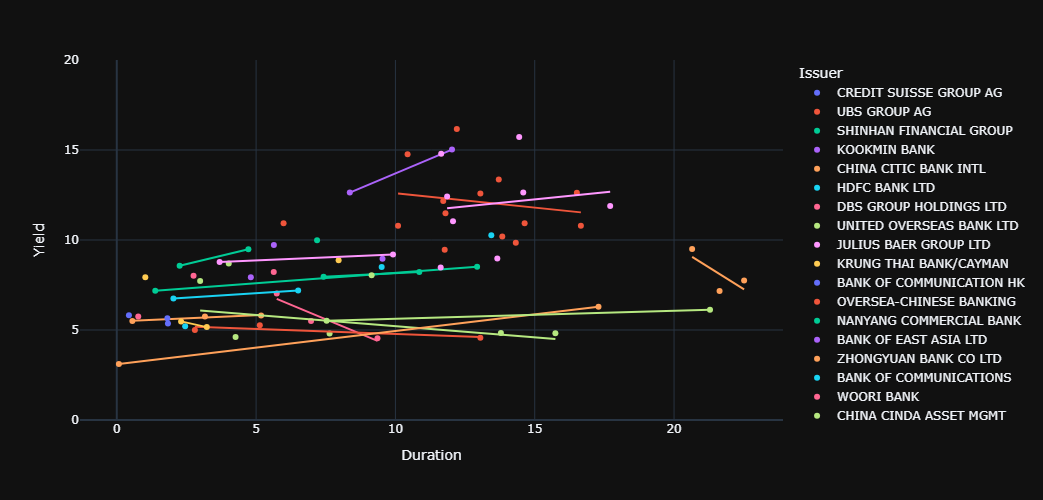

In [9]:
fig = px.scatter(df_bonds_axes, x=df_bonds_axes['Duration'], y=df_bonds_axes['Yield'],hover_data=['Name'],color='Issuer',trendline ='ols')
fig.update_layout(yaxis_range=[0,20]) 
fig.update_layout(width=800,height=500,template='plotly_dark')
#comment to see CS AT1s performance

fig.show()

## Axes data for liquidity 
### Average liquidity across country & ratings
###### Difference = Axed Yield - yield of bond. The higher the difference:
######  >> the less liquid a market is.
######  >> it's cheaper to buy from your broker who sent the axes

In [17]:
df_axes = pd.pivot_table(df_at1, values='Difference', index='Country',
                    columns=['Rating'], aggfunc='mean')

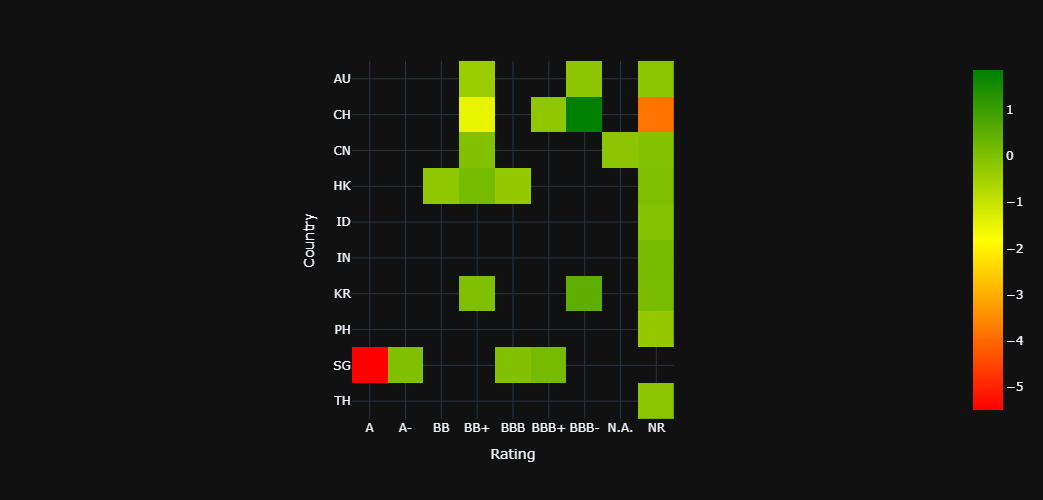

In [18]:
fig = px.imshow(df_axes, x= df_axes.columns, y=df_axes.index)
fig.update_layout(width=800,height=500,template='plotly_dark')
fig.update_coloraxes(
    showscale=True,
    colorscale=[
        (0.0, 'Red'),
        (0.5, 'Yellow'),
        (1,'Green')
    ],
)
fig.show()

In [13]:
## BBLP is offering cheaper bonds
df_bonds_axes.head()

,Name,Issuer,Dealer,Yield,Duration,Difference
ID,,,,,,
ZR118728 Corp,CS 6 ⅜ PERP,CREDIT SUISSE GROUP AG,BBLP,84.481089,0.481381,25.333911
ZS877681 Corp,CS 5 ⅝ PERP,CREDIT SUISSE GROUP AG,BBLP,69.131139,0.410550,14.886261
AU192314 Corp,CS 3 ½ PERP,CREDIT SUISSE GROUP AG,BBLP,45.957490,0.887711,3.710210
AW940669 Corp,UBS 7 PERP,UBS GROUP AG,BBLP,14.770095,10.437174,2.941405
ZR364635 Corp,CS 3 PERP,CREDIT SUISSE GROUP AG,BBLP,38.834175,1.431974,2.018625


In [14]:
## BBLP is offering more expensive bonds
df_bonds_axes.tail()

,Name,Issuer,Dealer,Yield,Duration,Difference
ID,,,,,,
AT519191 Corp,CS 7 ½ PERP,CREDIT SUISSE GROUP AG,BBLP,133.241612,0.336967,-5.836612
BK790508 Corp,CS 5 ¼ PERP,CREDIT SUISSE GROUP AG,BBLP,73.080379,0.595993,-7.122479
BT359061 Corp,UBS 4 ⅞ PERP,UBS GROUP AG,BBLP,12.589001,13.049637,-12.589001
AS963773 Corp,VONTOB 2 ⅝ PERP,VONTOBEL HOLDING AG,BBLP,22.092194,16.313675,-14.970084
AU388749 Corp,CS 7 ¼ PERP,CREDIT SUISSE GROUP AG,BBLP,105.453388,0.467639,-105.453388


In [23]:
# Use BQL function to navigate the Corporate Structure
issuer = bq.univ.fundamentalticker(univ)

# Fields to request
cet1={'CET1': bq.data.BS_CE_TIER_1_RATIO_FULLY_LOADED()['value'],
      'Higher': bq.func.if_(bq.data.BS_CE_TIER_1_RATIO_FULLY_LOADED()['value'] >bq.data.BS_CE_TIER_1_RATIO_FULLY_LOADED().groupavg()['value'],'Safer','Careful')
     }


# Create Request, Execute
req = bql.Request(issuer,cet1,with_params = {'FPT':'A','xlfill':'-'})
res = bq.execute(req)

# Get the response
df = bql.combined_df(res)


In [24]:
df

,CET1,Higher
ID,,
CSGN SW Equity,14.10,Careful
UBSG SW Equity,14.20,Careful
AXSB IN Equity,NaN,Careful
BAER SW Equity,14.00,Careful
OCBC SP Equity,15.20,Safer
1216 HK Equity,NaN,Careful
055550 KS Equity,12.73,Careful
1203Z SW Equity,NaN,Careful
EFGN SW Equity,14.70,Safer
